# A/B тест

# Введение

Перед нами представлена информация о гипотезах для увеличения выручки интернет-магазина. Всего имеются данные о 9 гипотезах с указанными параметрами Reach, Impact, Confidence и Effort.
Также представлены данные о количестве пользователей и заказах пользователей, участвовавших в А/В тестировании, с указанием даты и принесенной выручки.

Цели работы: приоритизировать гипотезы и проанализировать результаты прошедшего А/В теста.

Для этого требуется решить следующие задачи.

<b> В части приоритизации гипотез: </b>
- Применить фреймворк ICE для приоритизации гипотез.
- Применить фреймворк RICE для приоритизации гипотез.
- Сравнить результаты от применения разных фреймворков.

<b> В части анализа А/В теста: </b>
- Проанализировать кумулятивную выручку, средний чек и конверсию по группам и сравнить их.
- Определить аномальные значения числа и стоимости заказа для пользователя.
- Посчитать статистическую значимость различий конверсии и среднего чека между группами по сырым и очищенным данным.
- Сделать выводы о необходимости продолжения теста и его результатах.

# Оглавление 
1. [Приоритизация гипотез](#step1)
    1. [Фреймворк ICE](#step1.1)
    2. [Фреймворк RICE](#step1.2)
    3. [Сравнение результатов применения фреймворков](#step1.3)
2. [Предобработка данных](#step2)
3. [Анализ A/B-теста](#step3)
    1. [Анализ кумулятивной выручки, среднего чека и конверсии по группам и их сравнение](#step3.1)
    2. [Определение аномальных значений количества и стоимости заказа на пользователя](#step3.2)
    3. [Расчет статистической значимости различий конверсии и среднего чека между группами по сырым и очищенным данным](#step3.3) 
    4. [Выводы о необходимости продолжения теста и его результатах](#step3.4)

# Часть 1. Приоритизация гипотез <a name="step1"></a>

Для начала ознакомимся с имеющимися данными по 9 предложенным гипотезам.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

## 1.1. Применение фреймворка ICE  <a name="step1.1"></a>

In [5]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [6]:
pd.set_option('display.max_colwidth', 1000)

In [7]:
print(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

При применении фреймворка ICE наиболее приоритетными гипотезами стали 8,0 и 7: 8 и 7 имеют высокие оценки по параметрам влияния и уверенности, 0 - лидер по влиянию на пользователя и имеет высокий балл по уверенности в оценке других параметров. При этом у всех трех гипотез средний балл в оценке сложности проверки гипотезы.

## 1.2. Применение фреймворка RICE  <a name="step1.2"></a>

In [8]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [9]:
pd.set_option('display.max_colwidth', 1000)

In [10]:
print(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Фреймворк RICE на первое место поставил гипотезу 7, на второе - 2, на третью - гипотезы 0 и 6. 0 и 7 были описаны ранее, при этом у 7 - наивысшая оценка по охвату пользователей. 2ая гипотеза имеют хорошую оценку охвата. Гипотеза 6 - "середнячок", при этом у нее хорошая оценка по сложности проверки гипотезы, за счет чего она также пробилась в топ.

## 1.3. Сравнение результатов применения фреймворков ICE и RICE  <a name="step1.3"></a>

Результат применения обоих фреймворков указывает на приоритет гипотез 0 и 7 - обе обладают наивысшей оценкой по одному из параметров: Impact (что дает лидерство в фреймворке ICE) и Reach (соответственно, лидерство в RICE). Гипотезы 2 и 6 просты в проверке + имеют высокую оценку по одному из других параметров, что дало им возможность войти в топ после применения фреймворка RICE. 

ICE, не учитывающий охват пользователей, возвел в приоритет гипотезу 8, хотя ее оценка охвата - всего 1 из 10. Соответсвенно, данная гипотеза хороша для проверки на малой выборке, когда нам не сильно важно набрать "массу" для проведения исследования - возможно, в случаях небольших интернет-магазинов или для товаров редкого спроса.

# Часть 2. Предобработка данных <a name="step2"></a>

Перед анализом результатов A/B теста изучим предоставленные данные.

Посмотрим на заголовки столбцов в таблицах, форматы данных, пропущенные значения, дубоирующиеся строки и на адекватность предоставленной информации в целом.

In [11]:
orders = pd.read_csv('/datasets/orders.csv')

In [12]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [15]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Первый взгляд на данные показывает, что пропущенных данных в таблице нет, но столбцы в таблице orders названы неудобно: заголовки из двух слов лучше заменить их на написание через нижнее подчеркивание и с прописной буквы.

In [17]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [18]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Формат представленных данных в части столбцов group, transaction_id, visitor_id, revenue и visitors подходит для дальнейшего анализа. А вот даты в формате object не позволят работать с ними, поэтому в этих столбцах нужно поменять тип данных.

In [19]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Проверим, есть ли среди наших данных дублирущиеся строки.

In [20]:
orders_duplicates = orders[orders.duplicated()]
print(orders_duplicates)

Empty DataFrame
Columns: [transaction_id, visitor_id, date, revenue, group]
Index: []


In [21]:
visitors_duplicates = visitors[visitors.duplicated()]
print(visitors_duplicates)

Empty DataFrame
Columns: [date, group, visitors]
Index: []


Дублирующихся строк нет.

Чтобы понять, насколько корректные данные перед нами представлены, и можем ли мы их использовать для дальнейшего анализа А/В теста, проверим, все ли пользователи относятся к одной группе.

In [22]:
repeated_list = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

In [23]:
repeated_list

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [24]:
len(repeated_list)

58

In [25]:
repeated = orders[orders.visitor_id.isin(repeated_list)]

In [26]:
repeated

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


Получается, 58 пользователей попали в обе группы. Это может помешать интерпретации результатов исследования, т.к. не ясно, что именно привело их к показанному результату. Всего у нас имеется 1197 записей о транзакциях пользователей, 181 - это 15% из них, лучше будет их удалить.

In [27]:
orders = orders[~orders.visitor_id.isin(repeated_list)].reset_index()

In [28]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


Итого, мы имеем информацию о 1016 заказах, совершенных пользователями групп А и В. Столбцы имеют нужный формат данных, их загловки переименованы, пропущенных значений нет. Данные о пользователях, попавших в обе группы, удалены, чтобы избежать искажения результатов исследования.

Данные готовы к дальнейшему анализу.

# Часть 3. Анализ A/B теста <a name="step3"></a>

## 3.1. Анализ кумулятивной выручки, среднего чека и конверсии по группам и их сравнение  <a name="step3.1"></a>

Начнем с построения графика кумулятивной выручки по датам.

In [29]:
datesGroups = orders[['date','group']].drop_duplicates()

In [30]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [31]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [32]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [33]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [34]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Кумулятивная выручка')

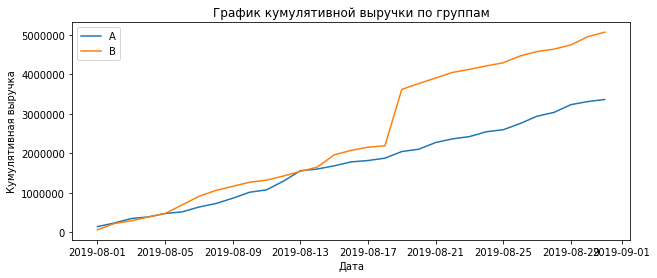

In [35]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')

График кумулятивной выручки по группам показывает, что до 13 августа выручка в обеих группах колебалась и была практически на одном уровне. 19 августа произошел всплеск и выручка по группе В резко увеличилась - скорее всего, здесь имеет место какой-то выброс: возможно, 1 или несколько пользователей совершили экстремально большой заказ в этот день. Также есть вероятность, что по какой-то причине в этот день много пользователей совершили заказы (больше обычного) - например, в этот день была большая распродажа. Но в таком случае и у группы А должна была резко подняться кумулятивная выручка, иначе мы нарушаем правила проведения эксперимента. Более точно понять причины такого явления нам поможет дальнейший анализ, и в частности, оценка среднего чека по группам.

Несмотря на резкий скачок в выручке по группе В видно, что после 13ого августа ее кумулятивная выручка стабильно первышает выручку группы А - значит потенциально наш эксперимент может оказаться успешным.

Теперь посмотрим на график кумулятивного среднего чека.

Text(0, 0.5, 'Кумулятивный средний чек')

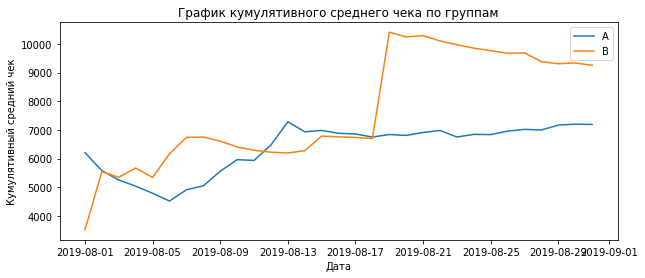

In [36]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

На графике кумулятивного среднего чека видны перепады в начале эксперимента (примерно до 15 августа) по обеим группам. 19 числа аналогично выручке появляется выброс, который меняет вид графика для группы В. Однако видно, что если для группы А "усмиренный" средний чек выходит на один уровень - примерно 7000 рублей, то для группы В он начинает плавно снижаться. Возможно, проведенного времени эксперимента недостаточно, чтобы чек по группе В вышел на плато.

При этом скачок 19 августа говорит о том, что всё-таки имеются экстремально большие значения в зазазе одного или небольшого числа людей. Если бы их было в этот день много, средний чек бы не изменился так интенсивно.

Следующий этап - построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0, 0.5, 'Отношение кумулятивных средних чеков')

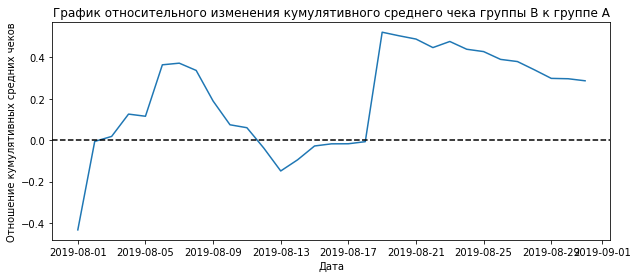

In [38]:
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивных средних чеков')

График относительного изменения кумулятивного среднего чека группы B к группе A "скачет" на протяжении всего периода анализа. Скорее всего, если убрать всплеск, отраженный 19 августа, мы увидим, как отношение кумулятивных средних чеков уйдет в отрицательную область, т.е. средний чек группы В будет плавно снижаться относительно чека группы А.

Теперь изучим график кумулятивной конверсии.

In [39]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [40]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0, 0.5, 'Кумулятивная конверсия')

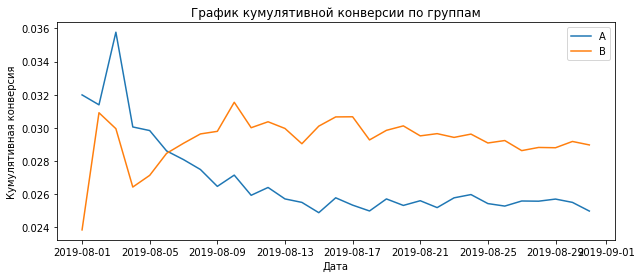

In [41]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

До 6 августа кумулятивная конверсия по группе А превышает конверсию по группе В. Но затем ситуация меняется - посетители из В стали совершать больше заказов относительно посетителей группы А. Это хороший знак - вероятно проверяемая нами гипотеза стимулирует пользователей к покупкам. Правда, непонятно, почему изо дня в день конверсия колеблется и не фиксируется на одном уровне - возможно, наш товар имеет некие особенности потребления и спрос на него не совсем равномерен.

Наконец, посмотрим на относительное изменение кумулятивной конверсии группы B к группе A.

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

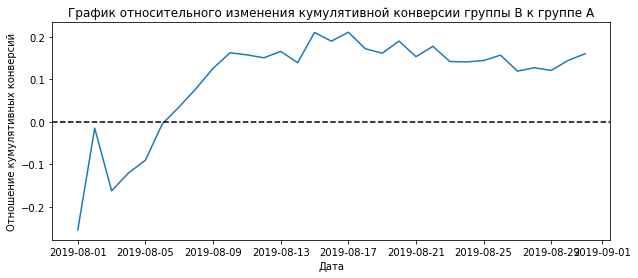

In [43]:
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивных конверсий')
plt.axhline(y=0, color='black', linestyle='--')

После 6 августа отношение кумулятивной конверсии группы В по отношению к группе А выходит на положительную величину: конверсия группы В с этого момента стабильно превышает аналогичной показатель группы А. На итоговый вывод еще может повлиять удаление выбросов из данных, но пока можно сказать, что наш эксперимент скорее является успешным и в долгосрочной перспективе позволяет держать конверсию на более высоком уровне.

## 3.2. Определение аномальных значений количества и стоимости заказа на пользователя  <a name="step3.2"></a>

Посмотрим на данные и определим, какую стоимость заказа и количество на пользователя стоит считать "нормальными", а какие - аномальными, способными повлиять на адекватность проведенного анализа.

In [44]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['user_id','orders']

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

Text(0, 0.5, 'Число заказов')

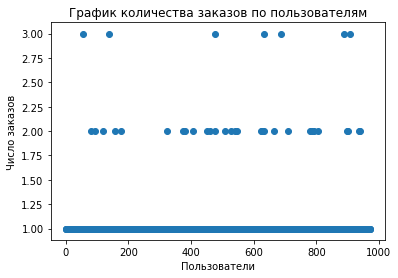

In [46]:
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')

In [47]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Таким образом, не более 5% пользователей делают более 1 заказа и не более 1% - более 2 заказов.
При этом на графике видно, что есть ряд пользователей, делающих по 2 заказа, и совсем мало - по 3 заказа. Т.к. таких пользователей очень мало, будем считать их аномалиями. Для того, чтобы очистить данные от выбросов, в дальнейшем уберем данные о тех пользователях, которые совершили более 1 заказа (таких менее 5% от общего числа).

Посмотрим теперь на среднюю стоимость одного заказа.

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))

Text(0, 0.5, 'Стоимость заказа')

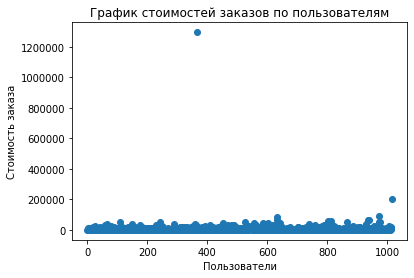

In [49]:
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')

In [50]:
orders['revenue'].median()

2955.0

In [51]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Получается, не более 5% наших заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. При этом медианное значение стоимости одного заказа - 2955 рублей, т.е. более половины пользователей совершают заказы на такую сумму. При этом видны огромные всплески на уровне 200000 и 13000000 рублей - скорее всего, в наших данных закралась ошибка, которая и повлияла на значения кумулятивного среднего чека и выручки.Лучше сообщить о ней разработчику, чтобы в будущем избежать попадания таких данных в отчет.
Отсеим заказы стоимостью более 53904 рублей как аномально дорогостоящие (мы ранее уже убирали 15% данных, на данном этапе не будем убирать большой процент крупных заказов).


## 3.3. Расчет статистической значимости различий конверсии и среднего чека между группами по сырым и очищенным данным  <a name="step3.3"></a>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Из общей таблицы по посетителям возьмем данные по ежедневному число посетителей из группы А, а затем вычислим кумулятивное число посетителей на каждый день (т.е. нарастающим итогом до указанного дня). Аналогичные действи делаем и для посетителей группы В.

In [52]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [53]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Из общей таблицы с заказами для групп А и В считаем ежедневное число пользователей (уникальных), совершивщих заказы и выручку, которую мы получили от них ежедневно. После этого также считаем кумулятивную выручку и число покупателей на каждый день.

In [54]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [55]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date' : 'max','ordersPerDateB' : 'sum','revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединяем таблицы в одну по общую по дате.

In [56]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [57]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Для каждой группы создадим таблицы, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

In [58]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Далее создадим переменные, в которых пользователям с заказами будет соответствовать число заказов этого пользователя, а пользователям без заказов — нули.

In [59]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Приступаем к проверке нулевой гипотезы.

Здесь Н0 будет формулироваться так: Нет статистически значимых различий между конверсиями тестовой и контрольной групп. Соответственно, альтернативная гипотеза Н1: Существуют статистически значимые различия между конверсиями тестовой и контрольной групп.

Гипотеза у нас двухсторонняя, поэтому для проведения теста Манн-Уитни зададим его параметр two-sided.

In [60]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))
print("Конверсия группы В по отношению к группе А = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.011
Конверсия группы В по отношению к группе А = 0.160


Получили p-value меньше, чем 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Предположительно, конверсия различна, причем второе число указывает на то, что в группе В она выше - на 16%. Но это относится к сырым данным, без удаленных выбросов, там ситуация может быть другая, проверим это позже.

Теперь посмотрим на статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Вновь сформулируем нулевую гипотезу Н0: Нет статистически значимых различий между средним чеком тестовой и контрольной групп.
Тогда Н1: Есть статистически значимые различия между средним чеком тестовой и контрольной групп.

In [61]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))
print("Средний чек группы В по отношению к группе А = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Средний чек группы В по отношению к группе А = 0.287


В данном случае, напротив, нулевую гипотезу мы отвергнуть не можем: предположительно, статистически значимых различий между средними чеками в группах нет. Хотя при этом средний чек группы В больше, чем в группе А, на 28,7%. Скорее всего, здесь сильное влияние оказывают экстремальные значения стоимости заказа.

Очистим исходные данные от "выбросов".

Посчитаем, сколько всего пользователей имеют значения суммы чека и количества заказов больше "стандартного".

Для этого сделаем срезы пользователей с числом заказов больше 1 и пользователей, совершивших заказы дороже 53904 (по определенной нами ранее границе "нормальности"). Объединим их в одной таблице и уберем дубликаты (одни и те же пользователи могли иметь много заказов и большой чек).

In [62]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.shape) 

(45,)


Обнаружилось 45 "аномальных" пользователей, уберем данные о них из исходных таблиц и рассчитаем статичтическую значимость.

In [63]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

Нулевая и альтернативная гипотезы в данном случае формулируются аналогично описанным выше, разница лишь в данных, на которых мы смотрим результат: до этого данные были "сырыми", сейчас они "очищенные".

In [64]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))
print("Конверсия группы В по отношению к группе А = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.008
Конверсия группы В по отношению к группе А = 0.188


Получили похожий результат, что и по сырым данным. Разница в конверсии даже немного увеличилась до 18,8%. 

In [65]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], True, 'two-sided')[1]))
print("Средний чек группы В по отношению к группе А = {0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value = 0.969
Средний чек группы В по отношению к группе А = 0.002


P-value остался больше 0,05 (он почти равен 1), но при этом поменялось отношение среднего чека группы В к группе А. Теперь можно сделать более логичный вывод о том, что нет статистической разницы между средними чеками в группах, ведь разница между ними составляет менее 1%. "Очистка" от аномальных данных помогла исключить шум при анализе данных.

## 3.4. Выводы о необходимости продолжения теста и его результатах  <a name="step3.4"></a>

Проведенный тест показал, что есть статистически значимая разница между конверсиями в тестовой и контрольной группе, причем в тестовой группе она существенно выше: на 17,4%. Выручка с течением времени растет в обеих группах. Тест не показал статистически значимого отличия в среднем чеке, но можно предположить, что при продолжении эксперимента они примерно сравняются в обеих группах. 

В целом, можно сделать вывод о том, что эксперимент оказался удачным и данных достаточно, чтобы остановить тест и внедрить предлагаемое изменение для всех пользователей.